In [8]:
from skimage import transform
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize

def piecewise_affine_warp(img, mode='sine', strength=10, grid_size=8, show=True):
    """
    Apply piecewise affine warp to an image with different deformation modes.

    Parameters:
        img      : Input image (H x W x C)
        mode     : Type of deformation ('sine', 'wave_x', 'zoom')
        strength : Degree of deformation
        grid_size: Number of control points per row/col
        show     : Whether to show the result with matplotlib

    Returns:
        warped image (same shape as input)
    """
    img = transform.resize(img, (img.shape[0], img.shape[1]), anti_aliasing=True)

    rows, cols = grid_size, grid_size
    src_cols = np.linspace(0, img.shape[1], cols)
    src_rows = np.linspace(0, img.shape[0], rows)
    src_rows, src_cols = np.meshgrid(src_rows, src_cols)
    src = np.dstack([src_cols.flat, src_rows.flat])[0]

    dst = src.copy()

    if mode == 'sine':
        dst[:, 1] += strength * np.sin(np.linspace(0, 2 * np.pi, len(dst)))
    elif mode == 'wave_x':
        dst[:, 0] += strength * np.sin(np.linspace(0, 2 * np.pi, len(dst)))
    elif mode == 'zoom':
        center = np.mean(src, axis=0)
        direction = src - center
        dst = src - strength * direction / np.linalg.norm(direction, axis=1)[:, np.newaxis]
    else:
        raise ValueError("Unsupported mode. Choose from 'sine', 'wave_x', 'zoom'.")

    
    tform = transform.PiecewiseAffineTransform()
    tform.estimate(src, dst)
    warped = transform.warp(img, tform)

    if show:
        visualize_affine_result(img, warped, mode)

    return warped

def visualize_affine_result(original, warped, mode_name=''): 
    """ Helper function to visualize original and warped images side by side. """
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(warped)
    plt.title(f"Warped ({mode_name})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


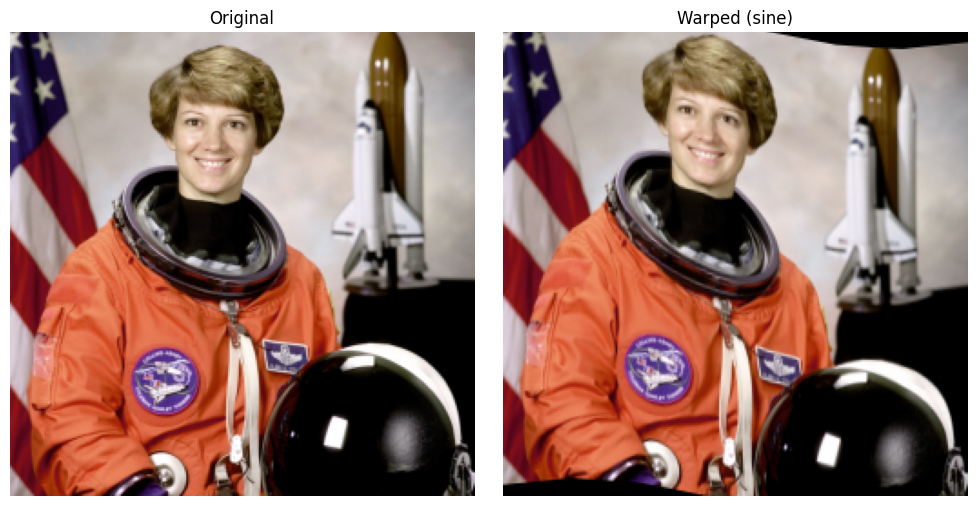

array([[[5.68627451e-01, 5.49019608e-01, 5.76470588e-01],
        [4.32257043e-01, 4.22878652e-01, 5.01727197e-01],
        [5.68677601e-01, 5.57763956e-01, 5.70713461e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[7.95253106e-01, 7.71616927e-01, 7.63667023e-01],
        [7.44176721e-01, 7.26813725e-01, 7.24298642e-01],
        [7.81512967e-01, 7.61008729e-01, 7.46928443e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[9.06522955e-01, 8.79071975e-01, 8.67307269e-01],
        [8.77204131e-01, 8.52729591e-01, 8.40964885e-01],
        [8.44273504e-01, 8.20175968e-01, 8.03381096e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00

In [9]:


# Load image with OpenCV
img = cv2.imread('example_img1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
img = resize(img, (256, 256))  # Resize to standard size

# Apply different warp modes
piecewise_affine_warp(img, mode='sine')


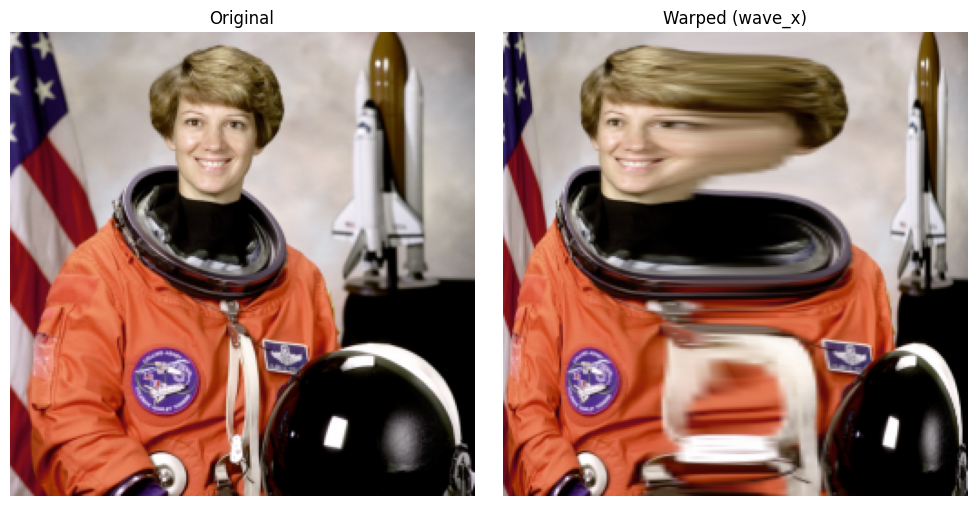

array([[[0.56862745, 0.54901961, 0.57647059],
        [0.45716984, 0.44932671, 0.48449043],
        [0.60605906, 0.57994614, 0.56123033],
        ...,
        [0.53240585, 0.49917832, 0.47265483],
        [0.52493977, 0.48964565, 0.45882353],
        [0.52122189, 0.48610114, 0.45882353]],

       [[0.78954883, 0.7662678 , 0.75867305],
        [0.73274043, 0.71705415, 0.70176315],
        [0.65999158, 0.63318426, 0.60901119],
        ...,
        [0.52836254, 0.49594076, 0.46666667],
        [0.5287396 , 0.48952391, 0.46991607],
        [0.52097841, 0.48176273, 0.4512755 ]],

       [[0.90364689, 0.8764443 , 0.86467959],
        [0.85042216, 0.82302193, 0.81113035],
        [0.55244172, 0.52166208, 0.52380492],
        ...,
        [0.54000551, 0.50588235, 0.47960234],
        [0.52469629, 0.49411765, 0.46507886],
        [0.52423966, 0.48627451, 0.46191141]],

       ...,

       [[0.6295958 , 0.54332129, 0.52355192],
        [0.61822769, 0.46606069, 0.47674823],
        [0.43883631, 0

In [10]:
piecewise_affine_warp(img, mode='wave_x', strength=40, grid_size=30)

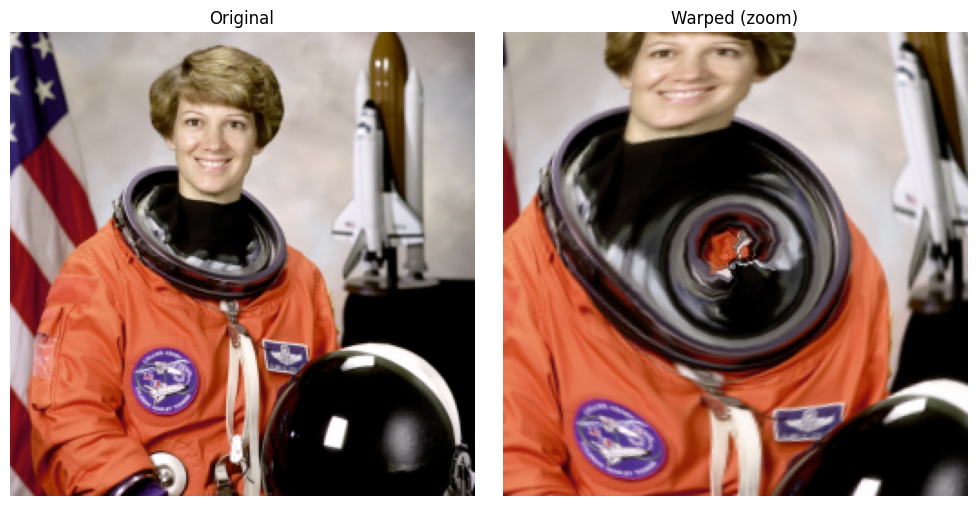

array([[[0.51647577, 0.47302161, 0.46110408],
        [0.6830993 , 0.6349908 , 0.60685903],
        [0.73941549, 0.69837307, 0.65905466],
        ...,
        [0.57939497, 0.56946074, 0.54625367],
        [0.60234276, 0.58330758, 0.57830692],
        [0.68154568, 0.65853844, 0.66848094]],

       [[0.47364045, 0.43551939, 0.43224841],
        [0.65153461, 0.61014486, 0.58112156],
        [0.72588675, 0.68846241, 0.64706518],
        ...,
        [0.58383957, 0.57571857, 0.54721708],
        [0.57755059, 0.56443606, 0.54926789],
        [0.64749992, 0.62805775, 0.62900036]],

       [[0.42360963, 0.39385838, 0.39244566],
        [0.61486143, 0.58066503, 0.54873192],
        [0.70834937, 0.67227144, 0.629918  ],
        ...,
        [0.60391784, 0.59288849, 0.57001052],
        [0.56112351, 0.54984365, 0.52975096],
        [0.61082969, 0.59668265, 0.58988089]],

       ...,

       [[0.78276222, 0.31575039, 0.17263342],
        [0.7547684 , 0.28198533, 0.1407871 ],
        [0.71525712, 0

In [11]:
piecewise_affine_warp(img, mode='zoom', strength=40, grid_size=30)